In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Concatenate,Conv2D, MaxPool2D, Dense, Dropout, Flatten, BatchNormalization, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator,array_to_img, img_to_array, load_img
import glob
from tensorflow.keras.losses import categorical_crossentropy

In [3]:
df=pd.read_csv(r'C:\Users\Kartikay\Desktop\DS Work\Lenskart\Lenskart_products.csv')

In [4]:
df.head()

,Unnamed: 0,product_name,product_id,parent_category,Image_Front,frame_shape
0,0,Vintage Persona C4,7641,eyeframe,http://d3b4di70nev5h5.cloudfront.net/media/cat...,Rectangle
1,1,Vintage Crazy-X C2 Red,7643,eyeframe,http://d3b4di70nev5h5.cloudfront.net/media/cat...,Rectangle
2,2,Jialedi Eyewear 1086 C8 Blue,8254,eyeframe,http://d3b4di70nev5h5.cloudfront.net/media/cat...,Rectangle
3,3,Jialedi Eyewear 1086 C6 Red,8255,eyeframe,http://d3b4di70nev5h5.cloudfront.net/media/cat...,Rectangle
4,4,Jialedi Eyewear 1086 C4 Tortoise Transperent,8256,eyeframe,http://d3b4di70nev5h5.cloudfront.net/media/cat...,Rectangle


In [5]:
df.tail()

,Unnamed: 0,product_name,product_id,parent_category,Image_Front,frame_shape
5565,5565,Black White Full Rim Rectangle Vincent Chase O...,99444,Non-Power Reading,http://d3b4di70nev5h5.cloudfront.net/media/cat...,Rectangle
5566,5566,Maroon Full Rim Rectangle Vincent Chase Online...,99445,Non-Power Reading,http://d3b4di70nev5h5.cloudfront.net/media/cat...,Rectangle
5567,5567,Lenskart TOI Special: Black Blue Full Rim Rect...,99446,Non-Power Reading,http://d3b4di70nev5h5.cloudfront.net/media/cat...,Rectangle
5568,5568,Tortoise Full Rim Rectangle Vincent Chase Onli...,99447,Non-Power Reading,http://d3b4di70nev5h5.cloudfront.net/media/cat...,Rectangle
5569,5569,Black Red Full Rim Rectangle Vincent Chase Onl...,99448,Non-Power Reading,http://d3b4di70nev5h5.cloudfront.net/media/cat...,Rectangle


In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
df.columns

Index(['product_name', 'product_id', 'parent_category', 'Image_Front',
       'frame_shape'],
      dtype='object')

In [9]:
df.shape

(5570, 5)

In [8]:
df.isnull().sum()
    

product_name       0
product_id         0
parent_category    0
Image_Front        0
frame_shape        0
dtype: int64

In [9]:
df.dtypes

product_name       object
product_id          int64
parent_category    object
Image_Front        object
frame_shape        object
dtype: object

In [10]:
#df.style.set_properties(**{'text-align': 'left'})
df.head().style.set_properties(**{'text-align': 'left'}).set_table_styles([ dict(selector='th', props=[('text-align', 'left')] ) ])

,product_name,product_id,parent_category,Image_Front,frame_shape
0,Vintage Persona C4,7641,eyeframe,http://d3b4di70nev5h5.cloudfront.net/media/catalog/product//v/i/vintage-persona-c4-52-15-135_1_.jpg,Rectangle
1,Vintage Crazy-X C2 Red,7643,eyeframe,http://d3b4di70nev5h5.cloudfront.net/media/catalog/product//v/i/vintage-crazy-x-c2-51-15-130_3__1.jpg,Rectangle
2,Jialedi Eyewear 1086 C8 Blue,8254,eyeframe,http://d3b4di70nev5h5.cloudfront.net/media/catalog/product//D/S/DSC_0001_6.JPG,Rectangle
3,Jialedi Eyewear 1086 C6 Red,8255,eyeframe,http://d3b4di70nev5h5.cloudfront.net/media/catalog/product//D/S/DSC_0010_4.JPG,Rectangle
4,Jialedi Eyewear 1086 C4 Tortoise Transperent,8256,eyeframe,http://d3b4di70nev5h5.cloudfront.net/media/catalog/product//D/S/DSC_0017_3.JPG,Rectangle


In [11]:
y=df['frame_shape'].value_counts()
y

Rectangle    3395
Aviator       986
Wayfarer      723
Oval          466
Name: frame_shape, dtype: int64

In [12]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [13]:
plt.style.use('tableau-colorblind10')

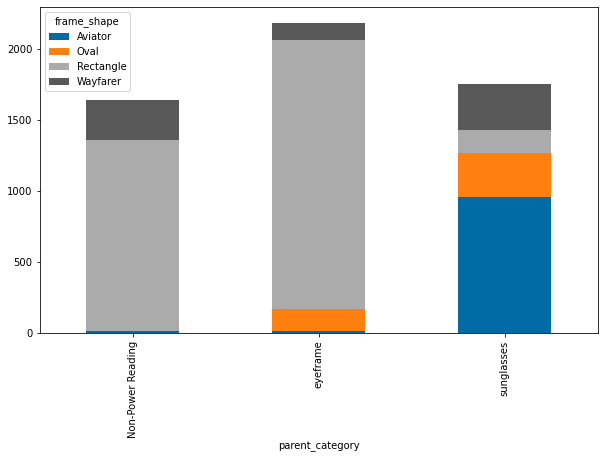

In [14]:
df.groupby(['parent_category','frame_shape'])['frame_shape'].count().unstack().plot(kind='bar', stacked=True, figsize=(10,6))
plt.show()

<AxesSubplot:xlabel='frame_shape'>

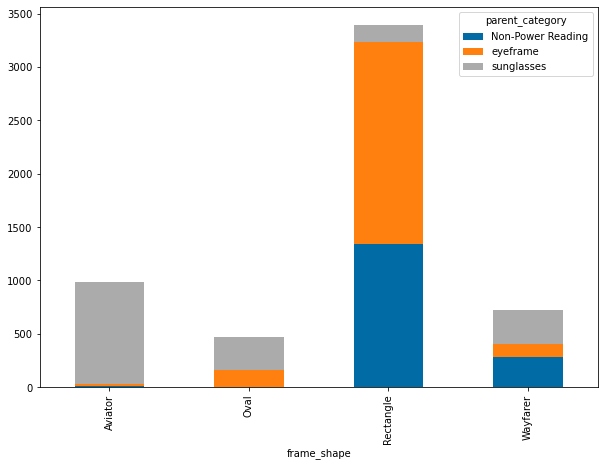

In [15]:
df.groupby(['frame_shape','parent_category'])['parent_category'].count().unstack().plot(kind='bar', stacked=True, figsize=(10,7))

Text(0, 0.5, 'Numbers')

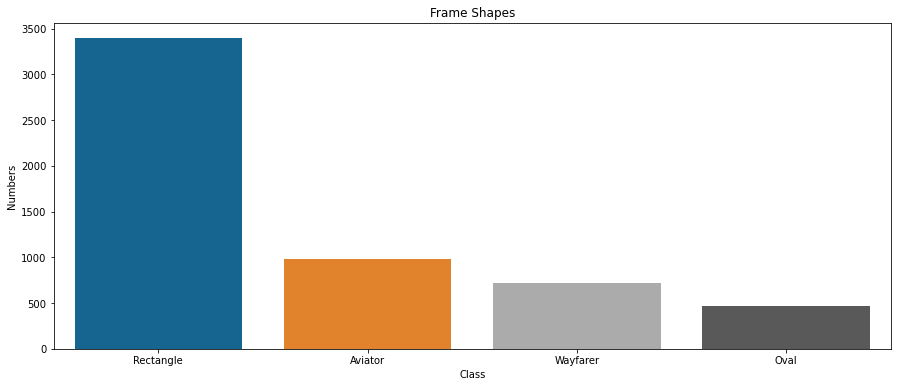

In [16]:
plt.figure(figsize=[15,6])
sns.barplot(y.index, y.values)
plt.title('Frame Shapes')
plt.xlabel("Class")
plt.ylabel("Numbers")

In [17]:
z=df['parent_category'].value_counts()
z

eyeframe             2183
sunglasses           1750
Non-Power Reading    1637
Name: parent_category, dtype: int64

In [18]:
df.isnull().sum()

product_name       0
product_id         0
parent_category    0
Image_Front        0
frame_shape        0
dtype: int64

Text(0, 0.5, 'Numbers')

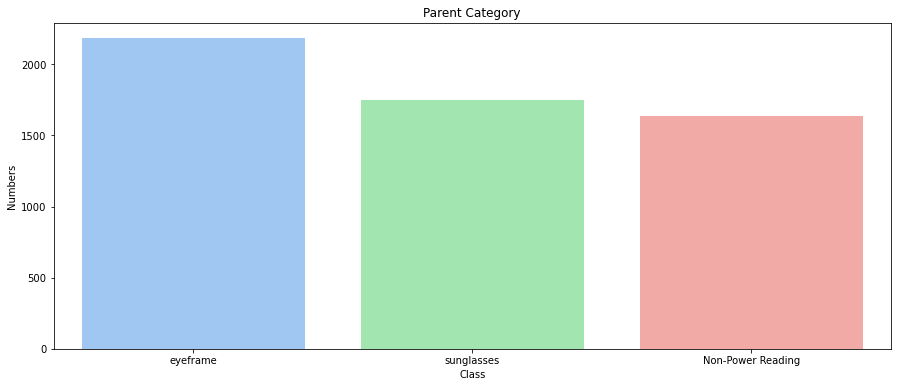

In [17]:
plt.figure(figsize=[15,6])
sns.barplot(z.index, z.values)
plt.title('Parent Category')
plt.xlabel("Class")
plt.ylabel("Numbers")

In [19]:
df.head()

,product_name,product_id,parent_category,Image_Front,frame_shape
0,Vintage Persona C4,7641,eyeframe,http://d3b4di70nev5h5.cloudfront.net/media/cat...,Rectangle
1,Vintage Crazy-X C2 Red,7643,eyeframe,http://d3b4di70nev5h5.cloudfront.net/media/cat...,Rectangle
2,Jialedi Eyewear 1086 C8 Blue,8254,eyeframe,http://d3b4di70nev5h5.cloudfront.net/media/cat...,Rectangle
3,Jialedi Eyewear 1086 C6 Red,8255,eyeframe,http://d3b4di70nev5h5.cloudfront.net/media/cat...,Rectangle
4,Jialedi Eyewear 1086 C4 Tortoise Transperent,8256,eyeframe,http://d3b4di70nev5h5.cloudfront.net/media/cat...,Rectangle


In [20]:
df.tail()

,product_name,product_id,parent_category,Image_Front,frame_shape
5565,Black White Full Rim Rectangle Vincent Chase O...,99444,Non-Power Reading,http://d3b4di70nev5h5.cloudfront.net/media/cat...,Rectangle
5566,Maroon Full Rim Rectangle Vincent Chase Online...,99445,Non-Power Reading,http://d3b4di70nev5h5.cloudfront.net/media/cat...,Rectangle
5567,Lenskart TOI Special: Black Blue Full Rim Rect...,99446,Non-Power Reading,http://d3b4di70nev5h5.cloudfront.net/media/cat...,Rectangle
5568,Tortoise Full Rim Rectangle Vincent Chase Onli...,99447,Non-Power Reading,http://d3b4di70nev5h5.cloudfront.net/media/cat...,Rectangle
5569,Black Red Full Rim Rectangle Vincent Chase Onl...,99448,Non-Power Reading,http://d3b4di70nev5h5.cloudfront.net/media/cat...,Rectangle


In [21]:
df1=df[['product_id','Image_Front']]
df1.head()

,product_id,Image_Front
0,7641,http://d3b4di70nev5h5.cloudfront.net/media/cat...
1,7643,http://d3b4di70nev5h5.cloudfront.net/media/cat...
2,8254,http://d3b4di70nev5h5.cloudfront.net/media/cat...
3,8255,http://d3b4di70nev5h5.cloudfront.net/media/cat...
4,8256,http://d3b4di70nev5h5.cloudfront.net/media/cat...


In [22]:
df['Image_Front'] = df['Image_Front'].replace({' ': '%20'}, regex=True)

In [23]:
df1['Image_Front'] = df1['Image_Front'].replace({' ': '%20'}, regex=True)

C:\Users\Kartikay\anaconda3\envs\Tensor\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
df['Image_Front'][2793]

'http://d3b4di70nev5h5.cloudfront.net/media/catalog/product//I/M/IMG_7040_4.JPG'

In [25]:
from PIL import Image
from urllib import request
from io import BytesIO
def prepare_dataset(path):
    try:
        url = path
        res = request.urlopen(url).read()
        img = Image.open(BytesIO(res)).resize((224,224))
        img = img_to_array(img)
        img = img/255.0
        #img = np.array(img)
        img = np.expand_dims(img, axis=0)
        return img
    except request.HTTPError:
        img= np.zeros((224, 224, 3))
        #img= np.array(img)
        img= np.expand_dims(x, axis=0)
        return img
#plt.imshow(Sample_Image)

In [26]:
x_set=[]
y_set1=[]
i=3901
for image in df1['Image_Front'][3901:]:
    x=prepare_dataset(image)
    if x.shape!=(1, 224, 224, 3):
        x=np.zeros((1,224, 224, 3))
    else:
        x=x
    if len(x_set) > 0:
        x_set= np.concatenate((x_set, x))
    else:
        x_set = x
    y_set1.append(df1['product_id'][i])
    if(i%10==0):
        print (i)
    
    i=i+1
#images_data=np.array(x_train)

"x_set=[]\ny_set1=[]\ni=3901\nfor image in df1['Image_Front'][3901:]:\n    x=prepare_dataset(image)\n    if x.shape!=(1, 224, 224, 3):\n        x=np.zeros((1,224, 224, 3))\n    else:\n        x=x\n    if len(x_set) > 0:\n        x_set= np.concatenate((x_set, x))\n    else:\n        x_set = x\n    y_set1.append(df1['product_id'][i])\n    if(i%10==0):\n        print (i)\n    \n    i=i+1\n#images_data=np.array(x_train)  "

In [27]:
#np.save(r'C:\Users\Kartikay\Desktop\DS Work\Lenskart\image_pixels_array.npy', x_train_f)
#np.save(r'C:\Users\Kartikay\Desktop\DS Work\Lenskart\product_id_array.npy', y_set)

In [28]:
x_train_f= np.load(r'C:\Users\Kartikay\Desktop\DS Work\Lenskart\image_pixels_array.npy')
y_set= np.load(r'C:\Users\Kartikay\Desktop\DS Work\Lenskart\product_id_array.npy')

In [29]:
pixel_dict=dict(zip(y_set,x_train_f))

In [30]:
len(y_set)

5570

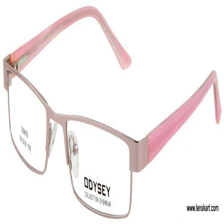

In [31]:
url = df['Image_Front'][1676]
res = request.urlopen(url).read()
img = Image.open(BytesIO(res)).resize((224,224))
#img_to_array(img).shape
img

In [32]:
df1['Image_Front'][2793]

'http://d3b4di70nev5h5.cloudfront.net/media/catalog/product//I/M/IMG_7040_4.JPG'

In [33]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.imagenet_utils import preprocess_input


In [34]:
modelv= VGG16(weights='imagenet',include_top=False, input_shape= (224,224,3))
modelv.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [35]:
for layer in modelv.layers:
     layer.trainable = False

In [33]:
# convert input to VGG format
x_train_i = preprocess_input(x_train_f)

In [ ]:
# use VGG to extract features
features = modelv.predict(x_train_i)

In [115]:
features.shape

(5570, 7, 7, 512)

In [129]:
#np.save(r'C:\Users\Kartikay\Desktop\DS Work\Lenskart\vgg_features_array.npy', features)

In [36]:
features=np.load(r'C:\Users\Kartikay\Desktop\DS Work\Lenskart\vgg_features_array.npy')

In [37]:
# flatten as one dimension
features_compress=[]
for x in features:
    features_compress.append(x.flatten())

In [38]:
len(features_compress)

5570

In [39]:
feature_dict=dict(zip(y_set,features_compress))

In [40]:
len(y_set)

5570

In [38]:
import pickle
#filehandler = open(r'C:\Users\Kartikay\Desktop\DS Work\Lenskart\features.pkl', 'wb')
#pickle.dump(feature_dict, filehandler)

In [41]:
len(feature_dict.values())

5569

In [42]:
import ipywidgets as widgets
import ipywidgets as widgets
from PIL import Image
from urllib import request
from io import BytesIO
import io

In [43]:
rf_df= pd.DataFrame({'product_id':y_set, 'features':features_compress})
#rf_df= pd.DataFrame.from_dict(feature_dict)
rf_df=pd.merge(rf_df,df,on= 'product_id',how='inner')
rf_df.drop('product_name',axis=1,inplace=True)

In [44]:
rf_df

,product_id,features,parent_category,Image_Front,frame_shape
0,7643,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",eyeframe,http://d3b4di70nev5h5.cloudfront.net/media/cat...,Rectangle
1,8254,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",eyeframe,http://d3b4di70nev5h5.cloudfront.net/media/cat...,Rectangle
2,8255,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",eyeframe,http://d3b4di70nev5h5.cloudfront.net/media/cat...,Rectangle
3,8256,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",eyeframe,http://d3b4di70nev5h5.cloudfront.net/media/cat...,Rectangle
4,8257,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",eyeframe,http://d3b4di70nev5h5.cloudfront.net/media/cat...,Rectangle
...,...,...,...,...,...
5565,99444,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Non-Power Reading,http://d3b4di70nev5h5.cloudfront.net/media/cat...,Rectangle
5566,99445,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Non-Power Reading,http://d3b4di70nev5h5.cloudfront.net/media/cat...,Rectangle
5567,99446,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Non-Power Reading,http://d3b4di70nev5h5.cloudfront.net/media/cat...,Rectangle
5568,99447,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Non-Power Reading,http://d3b4di70nev5h5.cloudfront.net/media/cat...,Rectangle


In [45]:
tri=[]
for i in range(0,len(x_train_f)) :
    tri.append(x_train_f[i])
rf_df['pixel_data']=tri

In [46]:
rf_df.head()

,product_id,features,parent_category,Image_Front,frame_shape,pixel_data
0,7643,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",eyeframe,http://d3b4di70nev5h5.cloudfront.net/media/cat...,Rectangle,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,..."
1,8254,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",eyeframe,http://d3b4di70nev5h5.cloudfront.net/media/cat...,Rectangle,"[[[0.9960784316062927, 1.0, 0.9803921580314636..."
2,8255,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",eyeframe,http://d3b4di70nev5h5.cloudfront.net/media/cat...,Rectangle,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,..."
3,8256,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",eyeframe,http://d3b4di70nev5h5.cloudfront.net/media/cat...,Rectangle,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,..."
4,8257,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",eyeframe,http://d3b4di70nev5h5.cloudfront.net/media/cat...,Rectangle,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,..."


In [47]:
rf_df.to_csv(r'C:\Users\Kartikay\Desktop\DS Work\Lenskart\Imagedata&features.csv')

In [48]:
#rf_df=pd.read_csv(r'C:\Users\Kartikay\Desktop\DS Work\Lenskart\Imagedata&features.csv')
#rf_df.head()

In [49]:
rf_df['parent_category'].value_counts()

eyeframe             2182
sunglasses           1751
Non-Power Reading    1637
Name: parent_category, dtype: int64

In [50]:
parent_cat=rf_df[['features','parent_category']]
parent_cat.head()

,features,parent_category
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",eyeframe
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",eyeframe
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",eyeframe
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",eyeframe
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",eyeframe


In [51]:
frame_shape=rf_df[['features','frame_shape']]
frame_shape.head()

,features,frame_shape
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Rectangle
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Rectangle
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Rectangle
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Rectangle
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Rectangle


In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
encode=LabelEncoder()

In [54]:
frame_shape['frame_shape']=encode.fit_transform(frame_shape['frame_shape'])
frame_shape.head()

C:\Users\Kartikay\anaconda3\envs\Tensor\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,features,frame_shape
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2


In [55]:
frame_shape['frame_shape'].value_counts()

2    3395
0     986
3     723
1     466
Name: frame_shape, dtype: int64

In [56]:
parent_cat['parent_category']=encode.fit_transform(parent_cat['parent_category'])
parent_cat.head()

C:\Users\Kartikay\anaconda3\envs\Tensor\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,features,parent_category
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1


In [57]:
cat_dict= {1:'eyeframe',
    0:'Non-Power Reading',
    2:'sunglasses'}

shap_dict={
    0:'Aviator',
    1:'Oval',
    2:'Rectangle',
    3:'Wayfarer'
}

In [58]:
inputt= Input(shape=(7,7,512))
flat=Flatten()(inputt)

In [59]:
#Category ANN
#l1= Dense(1024, activation='relu',input_shape=(1,25088))(features_compress)

#flat11=Flatten()(inputt)
fc11 = Dense(1024, activation='relu', name='fc11')(flat)
drop11 = Dropout(0.01, name='drop11')(fc11)
fc12 = Dense(1024, activation='relu', name='fc12')(drop11)
drop12= Dropout(0.01, name='drop12')(fc12)
fc13 = Dense(512, activation='relu', name='fc13')(drop12)
drop13= Dropout(0.01, name='drop13')(fc13)
fc14 = Dense(512, activation='relu', name='fc14')(drop13)
drop14= Dropout(0.01, name='drop14')(fc14)
op_cat= Dense(3, activation='softmax', name='op_cat')(drop14)



In [60]:
#inputt2= Input(shape=(7,7,512))
#flat22=Flatten()(inputt)
fc21= Dense(1024, activation='relu', name='fc21')(flat)
drop21 = Dropout(0.01, name='drop21')(fc21)
fc22 = Dense(1024, activation='relu', name='fc22')(drop21)
drop22= Dropout(0.01, name='drop22')(fc22)
fc23 = Dense(512, activation='relu', name='fc23')(drop22)
drop23= Dropout(0.01, name='drop23')(fc23)
fc24 = Dense(512, activation='relu', name='fc24')(drop23)
drop24= Dropout(0.01, name='drop24')(fc24)
op_shape= Dense(4, activation='softmax', name='op_shape')(drop24)


In [61]:
model=Model(inputs=[inputt],outputs=[op_cat,op_shape])
#loss={'op_cat':'categorical_crossentropy','op_shape':'categorical_crossentropy'}
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
             metrics = ['accuracy'])


In [177]:
history= model.fit(features,{'op_cat':parent_cat['parent_category'],'op_shape':frame_shape['frame_shape']},
          epochs=250, batch_size=128,verbose=1)

Train on 5570 samples
Epoch 1/250
5570/5570 [==============================] - 22s 4ms/sample - loss: 3.0686 - op_cat_loss: 1.4538 - op_shape_loss: 1.6011 - op_cat_accuracy: 0.5305 - op_shape_accuracy: 0.5571
Epoch 2/250
5570/5570 [==============================] - 20s 4ms/sample - loss: 1.5237 - op_cat_loss: 0.6079 - op_shape_loss: 0.9135 - op_cat_accuracy: 0.7167 - op_shape_accuracy: 0.6395
Epoch 3/250
5570/5570 [==============================] - 20s 4ms/sample - loss: 1.3599 - op_cat_loss: 0.4981 - op_shape_loss: 0.8581 - op_cat_accuracy: 0.7813 - op_shape_accuracy: 0.6684
Epoch 4/250
5570/5570 [==============================] - 19s 3ms/sample - loss: 1.1349 - op_cat_loss: 0.3626 - op_shape_loss: 0.7709 - op_cat_accuracy: 0.8571 - op_shape_accuracy: 0.7070
Epoch 5/250
5570/5570 [==============================] - 20s 4ms/sample - loss: 1.1034 - op_cat_loss: 0.3310 - op_shape_loss: 0.7722 - op_cat_accuracy: 0.8709 - op_shape_accuracy: 0.7002
Epoch 6/250
5570/5570 [====================

In [180]:
print(history.history.keys())

dict_keys(['loss', 'op_cat_loss', 'op_shape_loss', 'op_cat_accuracy', 'op_shape_accuracy'])


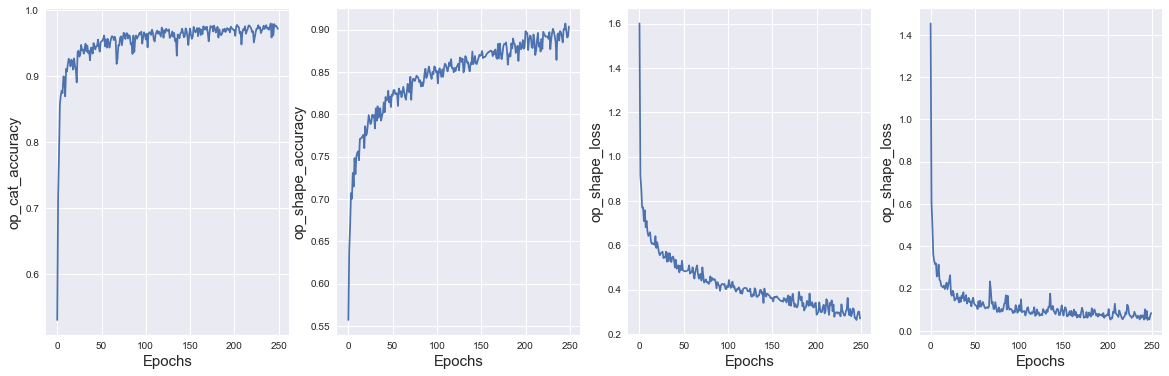

In [202]:

plt.figure(figsize=[20,6])
plt.style.use('seaborn')
plt.subplot(1, 4, 1)
plt.plot(history.history['op_cat_accuracy'])
plt.ylabel('op_cat_accuracy',size=15)
plt.xlabel('Epochs',size=15)
plt.subplot(1, 4, 2)
plt.plot(history.history['op_shape_accuracy'])
plt.ylabel('op_shape_accuracy',size=15)
plt.xlabel('Epochs',size=15)
plt.subplot(1, 4, 3)
plt.plot(history.history['op_shape_loss'])
plt.ylabel('op_shape_loss',size=15)
plt.xlabel('Epochs',size=15)
plt.subplot(1, 4, 4)
plt.plot(history.history['op_cat_loss'])
plt.xlabel('Epochs',size=15)
plt.ylabel('op_cat_loss',size=15)
plt.legend
plt.show()

In [210]:
model_json = model.to_json()
with open(r"C:\Users\Kartikay\Desktop\DS Work\Lenskart\model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(r"C:\Users\Kartikay\Desktop\DS Work\Lenskart\model.h5")
print("Saved model to disk")



Saved model to disk


In [62]:
from tensorflow.keras.models import model_from_json

In [63]:
json_file = open(r'C:\Users\Kartikay\Desktop\DS Work\Lenskart\model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model =model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(r"C:\Users\Kartikay\Desktop\DS Work\Lenskart\model.h5")
print("Loaded model from disk")

Loaded model from disk


In [64]:
widgets.FileUpload(
    accept='',  # Accepted file extension e.g. '.txt', '.pdf', 'image/*', 'image/*,.pdf'
    multiple=False  # True to accept multiple files upload else False
)

FileUpload(value={}, description='Upload')

In [65]:
uploader = widgets.FileUpload()
display(uploader)

FileUpload(value={}, description='Upload')

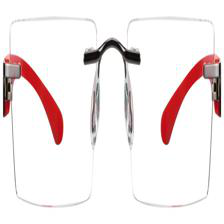

In [66]:
for name, file_info in uploader.value.items():
    img_upld = Image.open(io.BytesIO(file_info['content'])).resize((224,224))
img_upld

In [67]:
import ipywidgets as widgets
from PIL import Image
from urllib import request
from io import BytesIO
import io
img_upld= img_to_array(img_upld)
img_upld = img_upld/255.0
#img = np.array(img)
img_upld = np.expand_dims(img_upld, axis=0)
feat_upld=modelv.predict(preprocess_input(img_upld))
feat_upld=feat_upld.flatten()

In [68]:
feat_upld.shape

(25088,)

In [69]:
index=loaded_model.predict(feat_upld.reshape(1,7,7,512))
index

[array([[9.7966695e-01, 2.0055545e-02, 2.7753721e-04]], dtype=float32),
 array([[8.525079e-04, 1.164387e-03, 9.939230e-01, 4.060174e-03]],
       dtype=float32)]

In [70]:
x=[]
for i in index:
    x.append(np.argmax(i))
print('The parent category of the frame is : ', cat_dict[x[0]])
print('The shape of the frame is : ', shap_dict[x[1]])   

The parent category of the frame is :  Non-Power Reading
The shape of the frame is :  Rectangle


In [71]:
filtered_ids= df[['product_id']][(df.parent_category==cat_dict[x[0]]) & (df.frame_shape==shap_dict[x[1]])]
i=0
for t in filtered_ids['product_id']:
    if t == 7641:
        filtered_ids.drop(i,inplace=True)
    i=i+1
filtered_ids

,product_id
3933,9101
3934,16442
3935,23892
3936,23893
3937,27830
...,...
5565,99444
5566,99445
5567,99446
5568,99447


In [72]:
from sklearn.metrics.pairwise import cosine_similarity

In [73]:
df_cos= pd.DataFrame({'product_id':[], 'score':[]})
for key in filtered_ids['product_id']:
    score= cosine_similarity(np.array([feat_upld]),np.array([feature_dict[key]]))
    #print(score)
    df_temp = pd.DataFrame({'product_id':[key], 'score':[score[[0]]]})
    #print(df_temp)
    df_cos=pd.concat((df_cos,df_temp),axis=0)
df_cos

,product_id,score
0,9101.0,[[0.98825395]]
0,16442.0,[[0.9963547]]
0,23892.0,[[0.9952655]]
0,23893.0,[[0.99645793]]
0,27830.0,[[0.9987009]]
...,...,...
0,99444.0,[[0.9574699]]
0,99445.0,[[0.97058874]]
0,99446.0,[[0.98264736]]
0,99447.0,[[0.9711684]]


In [74]:
feat_upld.shape

(25088,)

In [75]:
df_cos=df_cos.reset_index()
df_cos.drop(['index'],axis=1,inplace=True)

In [76]:
df_cos_sim=df_cos.sort_values(by=['score'],ascending=False).iloc[:11,:]
df_cos_sim['product_id']=df_cos_sim['product_id'].astype(int)
df_cos_sim

,product_id,score
416,92552,[[0.9999892]]
415,92550,[[0.9999108]]
414,92548,[[0.99987894]]
670,94082,[[0.9998048]]
420,92597,[[0.99979115]]
166,81860,[[0.99975014]]
417,92563,[[0.99974155]]
429,92740,[[0.9997407]]
196,83444,[[0.9997229]]
1206,98218,[[0.99970794]]


In [77]:
df_cos_sim=pd.merge(df_cos_sim,df1,on='product_id',how='inner')
df_cos_sim

,product_id,score,Image_Front
0,92552,[[0.9999892]],http://d3b4di70nev5h5.cloudfront.net/media/cat...
1,92550,[[0.9999108]],http://d3b4di70nev5h5.cloudfront.net/media/cat...
2,92548,[[0.99987894]],http://d3b4di70nev5h5.cloudfront.net/media/cat...
3,94082,[[0.9998048]],http://d3b4di70nev5h5.cloudfront.net/media/cat...
4,92597,[[0.99979115]],http://d3b4di70nev5h5.cloudfront.net/media/cat...
5,81860,[[0.99975014]],http://d3b4di70nev5h5.cloudfront.net/media/cat...
6,92563,[[0.99974155]],http://d3b4di70nev5h5.cloudfront.net/media/cat...
7,92740,[[0.9997407]],http://d3b4di70nev5h5.cloudfront.net/media/cat...
8,83444,[[0.9997229]],http://d3b4di70nev5h5.cloudfront.net/media/cat...
9,98218,[[0.99970794]],http://d3b4di70nev5h5.cloudfront.net/media/cat...


In [78]:
print("Top 10 Similar Images are: ")

#for image in df_cos_sim['Image_Front']:
        ##url= image
        #res = request.urlopen(url).read()
        #img = Image.open(BytesIO(res)).resize((224,224))
        #img
        
        #img_to_array(img).shape
    #print(img)
    #except request.HTTPError:
        #pass
        #img= np.array(img)
        #img= np.expand_dims(x, axis=0)
        #return img


Top 10 Similar Images are: 


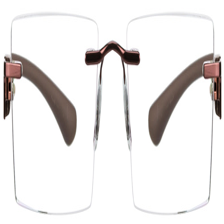

In [79]:
url= df_cos_sim['Image_Front'][1]
res = request.urlopen(url).read()
img = Image.open(BytesIO(res)).resize((224,224))
#img_to_array(img).shape
img

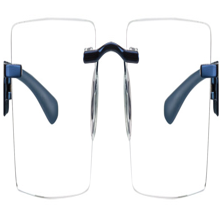

In [80]:
url= df_cos_sim['Image_Front'][2]
res = request.urlopen(url).read()
img = Image.open(BytesIO(res)).resize((224,224))
#img_to_array(img).shape
img

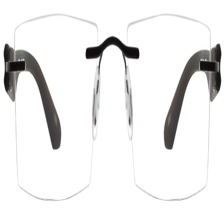

In [81]:
url= df_cos_sim['Image_Front'][3]
res = request.urlopen(url).read()
img = Image.open(BytesIO(res)).resize((224,224))
#img_to_array(img).shape
img

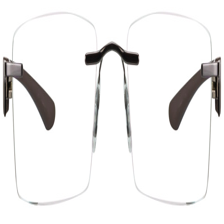

In [82]:
url= df_cos_sim['Image_Front'][4]
res = request.urlopen(url).read()
img = Image.open(BytesIO(res)).resize((224,224))
#img_to_array(img).shape
img

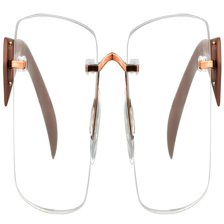

In [83]:
url= df_cos_sim['Image_Front'][5]
res = request.urlopen(url).read()
img = Image.open(BytesIO(res)).resize((224,224))
#img_to_array(img).shape
img

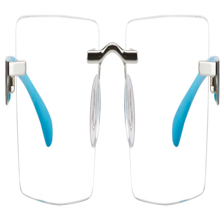

In [84]:
url= df_cos_sim['Image_Front'][6]
res = request.urlopen(url).read()
img = Image.open(BytesIO(res)).resize((224,224))
#img_to_array(img).shape
img

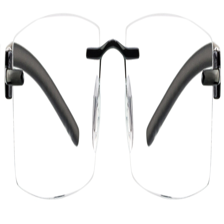

In [85]:
url= df_cos_sim['Image_Front'][7]
res = request.urlopen(url).read()
img = Image.open(BytesIO(res)).resize((224,224))
#img_to_array(img).shape
img

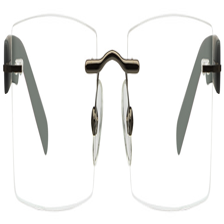

In [86]:
url= df_cos_sim['Image_Front'][8]
res = request.urlopen(url).read()
img = Image.open(BytesIO(res)).resize((224,224))
#img_to_array(img).shape
img

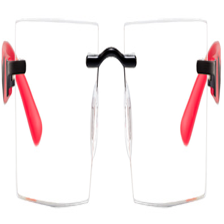

In [87]:
url= df_cos_sim['Image_Front'][9]
res = request.urlopen(url).read()
img = Image.open(BytesIO(res)).resize((224,224))
#img_to_array(img).shape
img

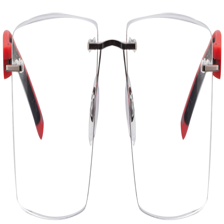

In [88]:
url= df_cos_sim['Image_Front'][10]
res = request.urlopen(url).read()
img = Image.open(BytesIO(res)).resize((224,224))
#img_to_array(img).shape
img

In [89]:
#API

In [90]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications import imagenet_utils
from PIL import Image
import numpy as np
import flask
import io
from flask import Flask, jsonify, request

# initialize our Flask application and the Keras model
app = flask.Flask(__name__)


In [ ]:
@app.route("/predict", methods=["POST"], endpoint='predict')
def predict():
    # initialize the data dictionary that will be returned from the
    # view
    #data = {"success": False}
    data={}
    if flask.request.method == "POST":
        #data['success']= '1'
        if flask.request.files.get("image"):
            #data['success']= '2'
            # read the image in PIL format
            image = flask.request.files["image"].read()
            image = Image.open(io.BytesIO(image)).resize((224,224))
            image= img_to_array(image)
            image= image/255.0
            #img = np.array(img)
            image= np.expand_dims(image, axis=0)
            feat_upld=modelv.predict(preprocess_input(image))
            feat_upld=feat_upld.flatten()
            index=loaded_model.predict(feat_upld.reshape(1,7,7,512))
            #print(index)
            x=[]
            for i in index:
                x.append(np.argmax(i))
            filtered_ids= df[['product_id']][(df.parent_category==cat_dict[x[0]]) & (df.frame_shape==shap_dict[x[1]])]
            i=0
            for t in filtered_ids['product_id']:
                if t == 7641:
                    filtered_ids.drop(i,inplace=True)
                i=i+1
            #print (filtered_ids)
            df_cos= pd.DataFrame({'product_id':[], 'score':[]})
            for key in filtered_ids['product_id']:
                score= cosine_similarity(np.array([feat_upld]),np.array([feature_dict[key]]))
                #print(score)
                df_temp = pd.DataFrame({'product_id':[key], 'score':[score[[0]]]})
                #print(df_temp)
                df_cos=pd.concat((df_cos,df_temp),axis=0)
            df_cos=df_cos.reset_index()
            df_cos.drop(['index'],axis=1,inplace=True)
            df_cos_sim=df_cos.sort_values(by=['score'],ascending=False).iloc[:11,:]
            df_cos_sim['product_id']=df_cos_sim['product_id'].astype(int)
            df_cos_sim=pd.merge(df_cos_sim,df1,on='product_id',how='inner')
            
            for id in df_cos_sim['product_id'][1:]:
                data[id] = df_cos_sim['Image_Front'][df_cos_sim.product_id==id].values[0]
                

            # indicate that the request was a success
            #data["success"] = True
            html = "<p><h4> Parent Category:  </h4>"+ cat_dict[x[0]]+ "<br><h4> Frame Shape: </h4>"+ shap_dict[x[1]] +"<br><h4> The Top 10 most similar images are : </h4> </p>"
            html += """ <div class="row">\n\t"""
            for id in data.keys():
                html += """<h2> </h2><br><h2>
            """
                html +=  """<div class="column">\n\t"""
                html += """<img src= 
                """
                html += str(data[id])
                html += """
                " alt="Frame" width="250" height="150">\n
                """
                html+="""</div>"""
            html+="""</div>"""
    # return the data dictionary as a JSON response
    return html
if __name__ == "__main__":
    print(("* Loading Keras model and Flask starting server..."
        "please wait until server has fully started"))
    #load_model()
    app.run()

* Loading Keras model and Flask starting server...please wait until server has fully started
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [07/May/2021 17:42:38] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [07/May/2021 17:42:39] "GET /favicon.ico HTTP/1.1" 404 -
